# Machine Learning Assignment Homework 2: Tree-based Models

## Introduction
In this notebook, we will create a classification tree from scratch and use a decision-tree based ensemble Machine Learning algorithm known as Boosting, particularly XGBoost (eXtreme Gradient Boosting) to improve predictive performance.  
The notebook will cover the following major steps:
- Data Processing
- Exploratory Data Analysis
- Classification Tree Implementation
- Boosting (XGBoost)
- Result Analysis and Inference

## Part A - Classification Tree

### A-1: Data Processing and Exploratory Data Analysis (EDA)
We'll start by reading the train and test datasets using the pandas library. We will then inspect the structure and content of the data.

## Data Processing

#### Data Loading

In [3]:
import os
import pandas as pd

# Current working directory
cwd = os.getcwd()

# Relative paths
data_train_path = os.path.join(cwd, '..', 'data', 'data_train-1.csv')
data_test_path = os.path.join(cwd, '..', 'data', 'data_test-1.csv')

# Load the training data
data_train = pd.read_csv(data_train_path)

# Load the test data
data_test = pd.read_csv(data_test_path)

We have used the `pandas` library and the `read_csv` function to load the train and test datasets.

#### Data Split

In [4]:
from sklearn.model_selection import train_test_split

# Split the data_train into data_train and data_valid (80% train, 20% validation)
data_train, data_valid = train_test_split(data_train, test_size=0.2, random_state=42)

- The `train_test_split()` function from `sklearn.model_selection` is used to split the training data into training and validation sets.
- `test_size=0.2` specifies that 20% of the data should be used for validation.
- `random_state=42` ensures the results are reproducible by setting a fixed seed for the random number generator.

In [5]:
# Display the first 5 rows
data_train.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
140,140,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
433,433,LP002341,Female,No,1,Graduate,No,2600,0.0,160.0,360.0,1.0,Urban,N
416,416,LP002140,Male,No,0,Graduate,No,8750,4167.0,308.0,360.0,1.0,Rural,N
489,489,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
25,25,LP001206,Male,Yes,3+,Graduate,No,3029,0.0,99.0,360.0,1.0,Urban,Y


#### Data Overview
Each row of the data corresponds to a sample and columns denote the features.  
The column named `Unnamed: 0` just contains the index of the rows and will not be a part of our training data. Similarly, the column named `Loan_ID` just denotes the ID assigned for each loan and will not contribute to any predictions or classification.  
So we have 11 columns representing features and 1 column representing the label (`Loan_Status`)  
The 12 columns in our training data denote the following:

1. **`Gender`**: Gender of the applicant (Male/Female).
2. **`Married`**: Marital status of the applicant (Yes/No).
3. **`Dependents`**: Number of dependents of the applicant.
4. **`Education`**: Education level of the applicant (Graduate/Not Graduate).
5. **`Self_Employed`**: Self-employment status of the applicant (Yes/No).
6. **`ApplicantIncome`**: Monthly income of the applicant.
7. **`CoapplicantIncome`**: Monthly income of the co-applicant.
8. **`LoanAmount`**: Loan amount requested (in thousands).
9. **`Loan_Amount_Term`**: Term of the loan.
10. **`Credit_History`**: Credit history of the applicant (1 = Good, 0 = Bad).
11. **`Property_Area`**: Area where the property is located (Urban, Semi-Urban, Rural).
12. **`Loan_Status`**: **Target Variable** - Loan approval status (Y = Approved, N = Not Approved).


In [6]:
# Print the shape of the data
print(f"\nShape of the training data: {data_train.shape}")
print(f"Column names in training data: {data_train.columns.to_list()}")

print(f"\nShape of the validation data: {data_valid.shape}")
print(f"Column names validation data: {data_valid.columns.to_list()}")

print(f"\nShape of the test data: {data_test.shape}")
print(f"Column names in test data: {data_test.columns.to_list()}")


Shape of the training data: (392, 14)
Column names in training data: ['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

Shape of the validation data: (99, 14)
Column names validation data: ['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

Shape of the test data: (123, 13)
Column names in test data: ['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


#### Data Cleaning

In [7]:
# Drop the 'Unnamed: 0' index column and 'Loan_ID' column
data_train.drop(columns=['Unnamed: 0', 'Loan_ID'], inplace=True)
data_valid.drop(columns=['Unnamed: 0', 'Loan_ID'], inplace=True)
data_test.drop(columns=['Unnamed: 0', 'Loan_ID'], inplace=True)

# Check for missing values
missing_values = data_train.isnull().sum()
print("Number of missing values for each column in the training data:")
print(missing_values)
print(f"Total number of missing values in the train dataset: {missing_values.sum()}\n")

missing_values = data_valid.isnull().sum()
print("Number of missing values for each column in the validation data:")
print(missing_values)
print(f"Total number of missing values in the validation dataset: {missing_values.sum()}\n")

missing_values = data_test.isnull().sum()
print("Number of missing values for each column in the test data:")
print(missing_values)
print(f"Total number of missing values in the test dataset: {missing_values.sum()}")

Number of missing values for each column in the training data:
Gender               10
Married               2
Dependents           10
Education             0
Self_Employed        22
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           15
Loan_Amount_Term      7
Credit_History       28
Property_Area         0
Loan_Status           0
dtype: int64
Total number of missing values in the train dataset: 94

Number of missing values for each column in the validation data:
Gender                2
Married               1
Dependents            3
Education             0
Self_Employed         7
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            2
Loan_Amount_Term      5
Credit_History       15
Property_Area         0
Loan_Status           0
dtype: int64
Total number of missing values in the validation dataset: 35

Number of missing values for each column in the test data:
Gender               1
Married              0
Dependents           2
Education            0


In [8]:
# Drop rows with missing data in original dataframe using inplace=True
data_train.dropna(inplace=True)
print(f"Shape of the train data after dropping missing data: {data_train.shape}")

data_valid.dropna(inplace=True)
print(f"Shape of the validation data after dropping missing data: {data_valid.shape}")

data_test.dropna(inplace=True)
print(f"Shape of the test data after dropping missing data: {data_test.shape}")

Shape of the train data after dropping missing data: (307, 12)
Shape of the validation data after dropping missing data: (66, 12)
Shape of the test data after dropping missing data: (107, 11)


#### Feature and Label Extraction

In [9]:
# Extract the features and the label
X_train = data_train.drop(columns=['Loan_Status'], inplace=False)
y_train = data_train['Loan_Status']

X_valid = data_valid.drop(columns=['Loan_Status'], inplace=False)
y_valid = data_valid['Loan_Status']

X_test = data_test

print(f"Features: {X_train.columns.tolist()}")
print(f"Label: {y_train.name}")

Features: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
Label: Loan_Status


The features include all columns except the target variable `Loan_Status`.  
The target variable represents the loan approval status (Y = Approved, N = Not Approved), which we aim to predict using our tree based classification models.

#### Encoding Non-Numerical Features and Label

Since our dataset contains several categorical features, we need to convert them into numerical values which can be used by our classification tree. The following steps are used:

1. **Identifying non-numerical columns**: We begin by identifying columns that contain categorical data (non-numerical values). These columns will need to be encoded before training the model.
2. **Manual Label Encoding**: For each non-numerical column, we manually encode the categorical values into integers. This ensures that our model can process these features correctly.
   - We map each unique value in the column to a unique integer.
   - The same mapping is applied consistently to the training, validation, and test sets to maintain uniformity.
3. **Encoding the Target Variable**: Our target variable, `Loan_Status`, is binary ('Y' for loan approval and 'N' for loan rejection). We convert it into binary values, where 'Y' becomes 1 and 'N' becomes 0.

Below is the implementation for encoding the non-numerical columns and the target variable.


In [10]:
# Identify non-numerical columns
non_numerical_columns = X_train.select_dtypes(include=['object']).columns
print(f"Non-numerical columns: {non_numerical_columns.tolist()}")

# Apply Label Encoding for each non-numerical column
label_encoders = {}
for column in non_numerical_columns:
    unique_values = sorted(X_train[column].unique())
    # Create a dictionary mapping each unique value to an integer
    encoding_map = {value: idx for idx, value in enumerate(unique_values)}
    # Reversing the encoding_map for 'Education' to maintain consistency 
    # with the common interpretation where 'Graduate' is assigned 1 and 'Not Graduate' is assigned 0 
    if column == 'Education':
        encoding_map = {'Not Graduate': 0, 'Graduate': 1}
    
    # Apply the mapping to train, validation, and test sets
    X_train[column] = X_train[column].map(encoding_map)
    X_valid[column] = X_valid[column].map(encoding_map)
    X_test[column] = X_test[column].map(encoding_map)
    
    label_encoders[column] = encoding_map

print("Encoding complete. Here are the encoded values for each non-numerical column:")
for column in non_numerical_columns:
    print(f"{column}: {label_encoders[column]}")

# Encode label (target variable) into binary (0 for 'N' and 1 for 'Y) for our classifier
y_train = (y_train == 'Y').astype(int)
y_valid = (y_valid == 'Y').astype(int)

Non-numerical columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
Encoding complete. Here are the encoded values for each non-numerical column:
Gender: {'Female': 0, 'Male': 1}
Married: {'No': 0, 'Yes': 1}
Dependents: {'0': 0, '1': 1, '2': 2, '3+': 3}
Education: {'Not Graduate': 0, 'Graduate': 1}
Self_Employed: {'No': 0, 'Yes': 1}
Property_Area: {'Rural': 0, 'Semiurban': 1, 'Urban': 2}


This encoding process ensures that all features and labels are now numerical, making them ready for input into our machine learning model.  
Next, we display the first 5 rows of our training data after encoding to verify that encoding has been applied properly.

In [11]:
# Display the first 5 rows after encoding
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
433,0,0,1,1,0,2600,0.0,160.0,360.0,1.0,2
416,1,0,0,1,0,8750,4167.0,308.0,360.0,1.0,0
489,1,1,3,1,0,81000,0.0,360.0,360.0,0.0,0
25,1,1,3,1,0,3029,0.0,99.0,360.0,1.0,2
461,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2


## Exploratory Data Analysis

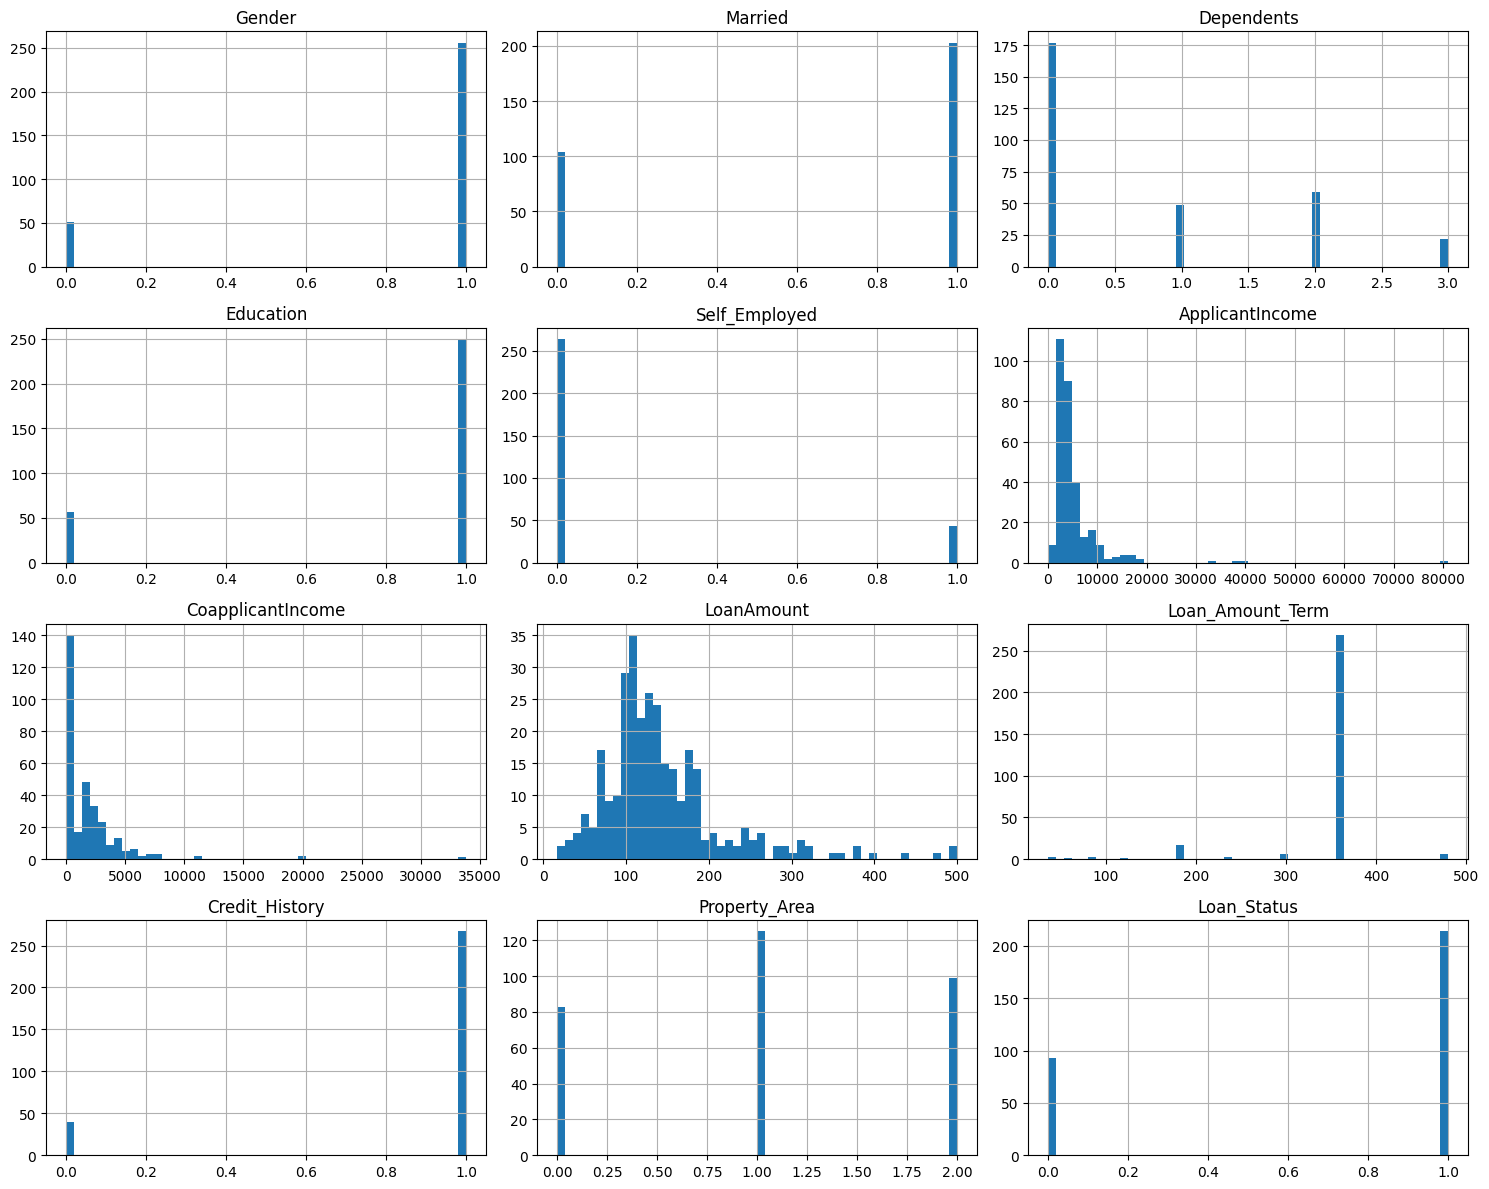

In [12]:
import matplotlib.pyplot as plt

# Concatenate the target variable (y_train) with the feature data (X_train) to include all the variables in the histogram
combined_data = pd.concat([X_train, y_train.rename("Loan_Status")], axis=1)

# Plot histograms for all features and the target variable
combined_data.hist(bins=50, figsize=(15, 12))
plt.tight_layout()
plt.show()

#### Histogram Analysis of All Features

The histograms plotted above provide insights into the distribution of the different features in the dataset. Let's discuss each variable:

1. **Gender**: 
   - This variable is binary, with 0 representing 'Female' and 1 representing 'Male'. The majority of applicants are male, as indicated by the large number of observations at 1.

2. **Married**: 
   - This is also a binary variable. A significant portion of the applicants are married (represented by 1), while a smaller group is unmarried (represented by 0).

3. **Dependents**: 
   - This variable shows a distribution across 0, 1, 2, and 3 (3+) dependents. A large proportion of the data falls under '0', indicating that many applicants have no dependents. The frequency drops as the number of dependents increases.

4. **Education**: 
   - The majority of applicants are graduates (represented by 1), while a smaller proportion have not graduated (represented by 0).

5. **Self_Employed**: 
   - Most applicants are not self-employed (represented by 0), with a much smaller fraction being self-employed (represented by 1). This could indicate that salaried individuals make up the majority of loan applicants in the dataset, which might impact loan approval since salaried applicants often have a more predictable income.

6. **ApplicantIncome**: 
   - The applicant income distribution is right-skewed, with most values concentrated in the lower range and a few extreme outliers. This suggests that while most applicants have modest incomes, there are some with significantly higher earnings.

7. **CoapplicantIncome**: 
   - Similar to applicant income, coapplicant income is highly concentrated near 0. Many applicants do not have coapplicants, leading to a high frequency of low values. There are a few cases with coapplicants contributing significantly higher income.

8. **LoanAmount**: 
   - The distribution of loan amounts is right-skewed, meaning that a majority of loans are on the lower side, with fewer high-value loans. This seems to be typical for loan data, where most applicants borrow smaller amounts.

9. **Loan_Amount_Term**: 
   - Most loans are taken for the most common term available which is 360 months (or maybe weeks). However, there are a few cases with shorter terms and longer terms.

10. **Credit_History**: 
    - This is a binary feature where 1 indicates a good credit history, and 0 indicates a poor or no credit history. The majority of applicants have a good credit history.

11. **Property_Area**: 
    - Property area is represented by three categories (Rural': 0, 'Semiurban': 1, 'Urban': 2). The distribution shows a relatively balanced number of applicants across the three categories.

12. **Loan_Status (Target Variable)**:
    - The `Loan_Status` histogram shows more loans being approved (`1`) than rejected (`0`). This imbalance in the target variable could affect model performance, as the classifier may predict approvals more frequently.

### Intuition Regarding the Variables
- The dataset contains a number of categorical variables (e.g., `Gender`, `Married`, `Education`), many of which are skewed toward one category. This could potentially lead to bias in the model if these distributions are not handled properly during training. However, instead of dropping these variables, they can provide valuable insights. Classification tree can naturally handle categorical variables by creating splits based on their distinct values. Therefore, I plan to retain these variables and allow the classification tree to determine which splits are most informative. The potential issue is that some categories are highly imbalanced. This imbalance could result in splits that favor the majority class and overlook the minority class. To address this, I will closely monitor the tree's performance and consider tuning parameters like `max_depth` or `min_samples_split` to prevent overfitting to majority categories.
  
- Continuous variables like `ApplicantIncome`, `CoapplicantIncome`, and `LoanAmount` are heavily right-skewed, suggesting the presence of outliers. These might need to be transformed (e.g., using log transformations) to improve the performance of the model. Handling these skewed distributions can help the model by reducing the influence of extreme values.

- The target variable `Loan_Status` is imbalanced, with more loan approvals than rejections. This imbalance could lead to bias in the model's predictions, as the model may tend to favor predicting the majority class (loan approvals). I plan to address this issue by adjusting the weights associated with each class in both my classification tree and in the XGBoost implementation. By giving more weight to the minority class (loan rejections), the model will treat errors on this class as more costly, encouraging it to better learn the patterns associated with loan rejections. In XGBoost, I will use the `scale_pos_weight` parameter to control the balance of positive and negative weights.

- **Model Evaluation**: To evaluate the performance of the model, apart from accuracy I will focus on metrics that are appropriate for imbalanced datasets. In addition to metrics like **precision, recall, and F1-score**, I will also consider **ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)**. ROC-AUC provides a balanced assessment of the model's ability to distinguish between the positive and negative classes, making it particularly useful in imbalanced scenarios. A higher ROC-AUC score will indicate better performance in correctly classifying both loan approvals and rejections.

In summary, these histograms provide an initial understanding of the data distribution. Imbalances in categorical variables and skewness in continuous variables suggest that some feature engineering, such as scaling or transformations, might be necessary before applying our classification tree model. To address the imbalance in the target variable, I will rely on class weighting, ensuring that the model treats errors on the minority class more seriously. I will also monitor the model's performance using precision, recall, F1-score, and ROC-AUC to ensure balanced predictions.

##### Applying Log Transformation to Skewed Features
To mitigate the effects (if any) of skewness and reduce the influence (if any) of outliers, we will apply a **log transformation** to these variables, to be on the safe side for training our models.

The log transformation will be applied to the training, validation, and test datasets.

In [13]:
import numpy as np

def apply_log_transformation(df, columns):
    df_transformed = df.copy()
    for column in columns:
        df_transformed[column] = np.log1p(df_transformed[column])  # log(x + 1) to handle zeros
    return df_transformed

# Columns that are skewed
skewed_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Apply log transformation to the training, validation, and test data
X_train = apply_log_transformation(X_train, skewed_columns)
X_valid = apply_log_transformation(X_valid, skewed_columns)
X_test = apply_log_transformation(X_test, skewed_columns)

The **log1p(x)** function is used to compute `log(1 + x)` for each of the specified columns, ensuring we avoid taking the log of zero. By applying this transformation, we reduce the skewness of the data, making the distributions more normal-like and might improve the performance of the model.

We have applied the transformation to the `X_train`, `X_valid`, and `X_test` datasets, preparing them for model training, validation and testing.

### A-2: Implementation

#### Metrics
Before implementing our classification tree or boosting model, we will first define a metrics class to calculate different metric that we can use later for evaluating the performance of our model.

In [14]:
class Metrics:
    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)
    
    def precision(self, y_true, y_pred):
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        predicted_positives = np.sum(y_pred == 1)
        return true_positives / predicted_positives if predicted_positives > 0 else 0
    
    def recall(self, y_true, y_pred):
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        actual_positives = np.sum(y_true == 1)
        return true_positives / actual_positives if actual_positives > 0 else 0
    
    def f1_score(self, y_true, y_pred):
        precision = self.precision(y_true, y_pred)
        recall = self.recall(y_true, y_pred)
        return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    def confusion_matrix(self, y_true, y_pred):
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        true_negatives = np.sum((y_true == 0) & (y_pred == 0))
        false_positives = np.sum((y_true == 0) & (y_pred == 1))
        false_negatives = np.sum((y_true == 1) & (y_pred == 0))        
        return np.array([[true_negatives, false_positives],
                         [false_negatives, true_positives]])
    
    def plot_confusion_matrix(self, y_true, y_pred, labels=['Negative', 'Positive']):
        cm = self.confusion_matrix(y_true, y_pred)
        fig, ax = plt.subplots(figsize=(5, 5))
        cax = ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.7)
        fig.colorbar(cax)
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', size='large')

        ax.set_xticks([0, 1])
        ax.set_xticklabels(labels)
        
        ax.set_yticks([0, 1])
        ax.set_yticklabels(labels)
        
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

metrics = Metrics()

In the above cell, I implemented a **Metrics** class containing various methods for evaluating our classification models.

1. **Accuracy**: Proportion of correct predictions:
   
   $$
   \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Predictions}}
   $$

2. **Precision**: Measures the proportion of positive predictions that are actually correct:

   $$
   \text{Precision} = \frac{TP}{TP + FP}
   $$

3. **Recall**: Measures the proportion of actual positives that are correctly predicted:

   $$
   \text{Recall} = \frac{TP}{TP + FN}
   $$

4. **F1 Score**: Harmonic mean of Precision and Recall:

   $$
   F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
   $$

5. **Confusion Matrix**: Summarizes classification results, breaking them down into true/false positives and negatives.

6. **Plot Confusion Matrix**: Visual representation of the confusion matrix for better understanding.


### Classification Tree Implementation

In [15]:
class ClassificationTree:
    class Node:
        def __init__(self, index=None, value=None, left=None, right=None, is_leaf=False, prediction=None):
            self.index = index          # Feature index for splitting
            self.value = value          # Split value
            self.left = left            # Left child (can be another Node)
            self.right = right          # Right child (can be another Node)
            self.is_leaf = is_leaf      # Boolean indicating if this is a leaf node
            self.prediction = prediction  # Predicted class if this is a leaf node

    def __init__(self, max_depth=3, min_samples_split=2, min_samples_leaf=1, class_weights=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.class_weights = class_weights if class_weights is not None else {}
        self.root = None  # The root of the tree

    def fit(self, X, y):
        # Convert Pandas DataFrame/Series to NumPy array if necessary
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        if isinstance(y, (pd.Series, pd.DataFrame)):
            y = y.to_numpy().reshape(-1)
        
        # Combine features and labels to create the training dataset
        dataset = np.hstack((X, y.reshape(-1, 1)))
        # Build the decision tree starting from the root
        self.root = self.build_tree(dataset)

    def predict(self, X):
        # Convert Pandas DataFrame to NumPy array if necessary
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        if len(X.shape) == 1:
            X = X.reshape(1, -1)
        
        # Predict each row in the dataset
        return np.array([self.predict_row(row, self.root) for row in X])

    def gini_index(self, groups, classes):
        # Calculate the Gini index for a split dataset with class weights
        n_instances = float(sum(len(group) for group in groups))
        gini = 0.0
        
        for group in groups:
            size = len(group)
            if size == 0:
                continue
            
            score = 0.0
            group_labels = np.array([row[-1] for row in group])
            for class_val in classes:
                p = np.sum(group_labels == class_val) / size
                weight = self.class_weights.get(class_val, 1)  # Get class weight, default to 1
                score += (p ** 2) * weight  # Adjust score with class weight
            
            gini += (1.0 - score) * (size / n_instances)
        return gini

    def split_dataset(self, index, value, dataset):
        # Split a dataset based on an attribute and a value
        left, right = list(), list()
        for row in dataset:
            if row[index] < value:
                left.append(row)
            else:
                right.append(row)
        return left, right

    def get_split(self, dataset):
        # Determine the best split for the dataset
        class_values = list(set(row[-1] for row in dataset))
        best_index, best_value, best_score, best_groups = None, None, float('inf'), None
        
        for index in range(len(dataset[0]) - 1):
            # Get unique values in the column
            unique_values = set(row[index] for row in dataset)
            
            for value in unique_values:                
                # Split the dataset at the each unique value in the column and calculate Gini
                groups = self.split_dataset(index, value, dataset)
                gini = self.gini_index(groups, class_values)
                
                # Update best split if Gini is lower
                if gini < best_score:
                    best_index, best_value, best_score, best_groups = index, value, gini, groups

        return best_index, best_value, best_groups

    def build_tree(self, dataset, depth=1):
        # Build the decision tree recursively
        index, value, groups = self.get_split(dataset)
        left, right = groups

        # Create a root node for this split
        node = self.Node(index=index, value=value)

        # Stopping condition: If all samples are of the same class, make a leaf node
        if len(set(row[-1] for row in left + right)) == 1:
            node.is_leaf = True
            node.prediction = self.to_terminal(left + right)
            return node

        # Check for maximum depth
        if depth >= self.max_depth:
            node.left = self.Node(is_leaf=True, prediction=self.to_terminal(left))
            node.right = self.Node(is_leaf=True, prediction=self.to_terminal(right))
            return node

        # Process left child
        if len(left) <= self.min_samples_split or len(left) < self.min_samples_leaf:
            node.left = self.Node(is_leaf=True, prediction=self.to_terminal(left))
        else:
            node.left = self.build_tree(left, depth + 1)

        # Process right child
        if len(right) <= self.min_samples_split or len(right) < self.min_samples_leaf:
            node.right = self.Node(is_leaf=True, prediction=self.to_terminal(right))
        else:
            node.right = self.build_tree(right, depth + 1)

        return node

    def to_terminal(self, group):
        # Create a terminal node with the most common label considering weights
        outcomes = [row[-1] for row in group]  # Class labels
        weights = [self.class_weights.get(outcome, 1) for outcome in outcomes]  # Get weights for each outcome
        
        # Weighted count of each class
        weight_count = {}
        for outcome, weight in zip(outcomes, weights):
            if outcome in weight_count:
                weight_count[outcome] += weight
            else:
                weight_count[outcome] = weight
                
        # Return the class with the highest weighted count
        return max(weight_count, key=weight_count.get)

    def predict_row(self, row, node):
        # Predict the target label for a single row
        if isinstance(row, (pd.Series, list)):
            row = np.array(row)

        if node.is_leaf:
            return node.prediction

        if row[node.index] < node.value:
            return self.predict_row(row, node.left)
        else:
            return self.predict_row(row, node.right)


In this section, I present my implementation of a classification tree. The goal of this project was to construct a classification tree from scratch, using a Gini index for determining optimal splits and I also included allowing for label class weights to address class imbalance.

### Thought Process

#### Class Definition

The implementation is encapsulated within a `ClassificationTree` class. This class contains a nested `Node` class to represent the structure of the tree. Each node can either be an internal node (representing a feature split) or a leaf node (providing a class prediction).

#### Key Methods

1. **Fit Method**  
   The `fit` method is responsible for training the classification tree on the provided dataset. It performs the following steps:
   - **Data Preparation**: Checks if the input features \( X \) and labels \( y \) are in the correct format (NumPy arrays) and combines them into a single dataset.
   - **Tree Building**: Initiates the tree-building process by calling the `build_tree` method, which recursively determines the best splits for the dataset.

2. **Prediction**
   The `predict` method uses the built tree to predict class labels for new samples by traversing the tree based on feature values.

3. **Gini Index Calculation**
   The Gini index is a measure of impurity used to evaluate the quality of a split.  
   The degree of Gini Index varies between 0 and 1, where  
   '0' denotes that all elements belong to a certain class or there exists only one class (pure), and  
   '1' denotes that the elements are randomly distributed across various classes (impure).  
   A Gini Index of '0.5 'denotes equally distributed elements into some classes.
   
   It is defined as:

   $$
   Gini = 1 - \sum_{i=1}^{n} p_i^2
   $$

   where $p_i$ is the probability of an object being classified to a particular class $i$. In my implementation, the Gini index is computed using class weights to adjust for class imbalance.  
   While building our classification tree, we would prefer to choose the attribute/feature with the least Gini Index at the node.

4. **Dataset Splitting**
   The dataset is split based on feature values. The method `split_dataset` separates the dataset into left and right groups based on a specified index and value.

5. **Finding Optimal Split**
   The method `get_split` iterates through all features and their corresponding values to find the best split that minimizes the Gini index.

6. **Building the Tree**
   The method `build_tree` constructs the decision tree recursively. It checks for stopping conditions based on maximum depth and the homogeneity of the groups. If the conditions are met, it creates leaf nodes with class predictions.

#### Handling Class Weights

To ensure that minority classes are given more importance during training, the class weights are passed into the model. Since our dataset has imbalanced classes (labels), it allows the model to make fairer predictions.

The `to_terminal` method calculates the predicted class for a terminal node by considering the weighted counts of each class label, ensuring that predictions favor the minority class when necessary.

The final classification tree can be used to make predictions on new data after being trained on a dataset. The model can handle class imbalance effectively due to the inclusion of class weights.

#### Flexibility and hyperparameters
The implementation allows for easy adjustment of hyperparameters such as `max_depth`, `min_samples_split`, and `min_samples_leaf`, alongwith the ability to provide `class_weights` giving the user control over the complexity of the tree.
 - `max_depth`: This limits the depth of the tree, which helps prevent overfitting.
 - `min_samples_split`: This specifies the minimum number of samples required to split an internal node.
 - `min_samples_leaf`: This sets the minimum number of samples that must be present in a leaf node.
 - `class_weights`: The dictionary class weights for each class. 

### Model Training and Validation

#### Class weights calculation

In [16]:
# Calculate class weights
unique_classes, class_counts = np.unique(y_train, return_counts=True)
total_samples = len(y_train)
class_weights = {cls: total_samples / (len(unique_classes) * count) for cls, count in zip(unique_classes, class_counts)}

In this section, I calculated the class weights to address potential class imbalance in the training dataset. By assigning different weights to classes based on their frequencies, we can improve the model's ability to correctly classify underrepresented classes.

#### Calculation of Class Weights

The class weights are calculated using the formula:

$$
\text{class\_weight} = \frac{N}{C \cdot n_i}
$$

where:
- $N$ is the total number of samples in the training dataset.
- $C$ is the total number of unique classes.
- $n_i$ is the number of samples in class $i$.

This formula ensures that classes with fewer instances receive higher weights, allowing the model to pay more attention to these classes during training. The calculated class weights are stored in a dictionary, where each key corresponds to a class, and the value represents its weight.

#### Hyperparameter tuning
##### Analyzing the Impact of `max_depth` and `min_samples_split` on our Classification Tree Accuracy and F1-score

In this part of the analysis, I aim to understand how different hyperparameters (`max_depth` and `min_samples_split`) affect the accuracy and f1-score of our decision tree model. Specifically, I varied the maximum depth of the tree (`max_depth`) from 2 to 10, and the `min_samples_split` parameter with values 2, 4, and 8.

- `max_depth`: Controls the maximum depth of the tree. Larger depths can result in overfitting, while smaller depths may lead to underfitting.
- `min_samples_split`: Determines the minimum number of samples required to split a node. A higher value results in fewer splits and can reduce overfitting, while a lower value allows more detailed splits.

The goal is to identify which combination of these parameters yields the highest accuracy on the validation set.

The resulting accuracy and f1-score for each combination is plotted to visualize the effect of `max_depth` and `min_samples_split` on the model's performance.

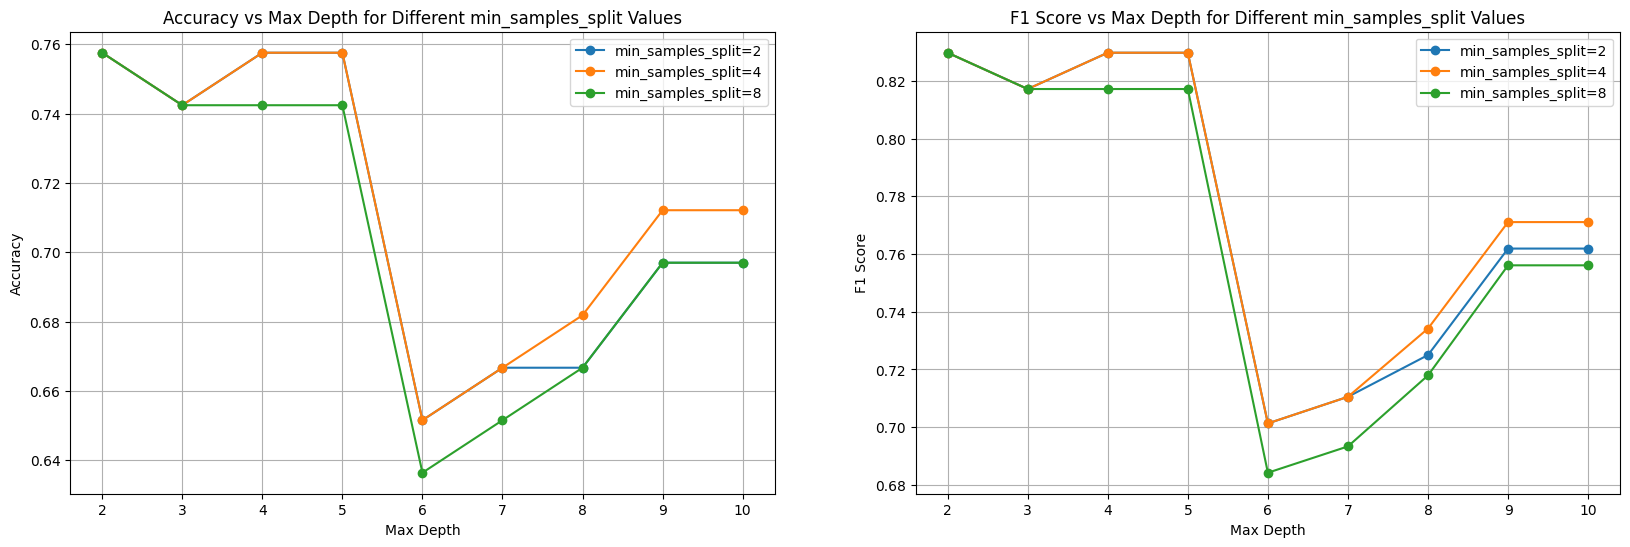

In [17]:
max_depths = np.arange(2, 11)  # Testing max_depth from 2 to 10
min_samples_splits = [2, 4, 8]  # Testing different min_samples_split

# Store accuracies and F1 scores for each combination
accuracies = {min_samples_split: [] for min_samples_split in min_samples_splits}
f1_scores = {min_samples_split: [] for min_samples_split in min_samples_splits}

for min_samples_split in min_samples_splits:
    for max_depth in max_depths:
        model = ClassificationTree(max_depth=max_depth, 
                                   min_samples_split=min_samples_split, 
                                   min_samples_leaf=1, 
                                   class_weights=class_weights)
        model.fit(X_train, y_train)
        predicted = model.predict(X_valid)
        accuracy = metrics.accuracy(y_true=y_valid, y_pred=predicted)
        accuracies[min_samples_split].append(accuracy)
        f1 = metrics.f1_score(y_true=y_valid, y_pred=predicted)
        f1_scores[min_samples_split].append(f1)

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plotting Accuracy vs Max Depth
for min_samples_split, acc in accuracies.items():
    axes[0].plot(max_depths, acc, marker='o', label=f'min_samples_split={min_samples_split}')
axes[0].set_title('Accuracy vs Max Depth for Different min_samples_split Values')
axes[0].set_xlabel('Max Depth')
axes[0].set_ylabel('Accuracy')
axes[0].set_xticks(max_depths)
axes[0].legend()
axes[0].grid()

# Plotting F1 Score vs Max Depth
for min_samples_split, f1 in f1_scores.items():
    axes[1].plot(max_depths, f1, marker='o', label=f'min_samples_split={min_samples_split}')
axes[1].set_title('F1 Score vs Max Depth for Different min_samples_split Values')
axes[1].set_xlabel('Max Depth')
axes[1].set_ylabel('F1 Score')
axes[1].set_xticks(max_depths)
axes[1].legend()
axes[1].grid()

plt.show()

#### Observations for Accuracy (or f1-score) vs. Max Depth with different `min_samples_split` values
We can see that f1-score has the similar trend as accuracy.

From the plot generated above, we can make the following observations:

1. For `min_samples_split` = 2, the model accuracy is relatively stable up to `max_depth` = 5, beyond which there is a sudden drop at `max_depth` = 6. After that, the accuracy starts increasing again as the depth increases.
2. When `min_samples_split` = 4, the model performs similar to `min_samples_split` = 2 but better than `min_samples_split` = 8.
3. For `min_samples_split` = 8, the accuracy follows a similar trend, but overall, it achieves slightly lower accuracy compared to the other two for most depths.

The drop in accuracy around `max_depth` = 6 may be indicative of overfitting in the model training.

The best combination seems to be `max_depth` = 4 or 5 and `min_samples_split` = 4, as they both achieve the highest accuracy (~0.76).


#### Analyzing the Impact of `min_samples_leaf` on Classification Tree Accuracy and F1-score

In the next step, I focus on another hyperparameter: `min_samples_leaf`. This parameter controls the minimum number of samples required to be at a leaf node. A higher value for `min_samples_leaf` will result in fewer nodes and may help to avoid overfitting, while a lower value allows for more granular splits.

Using the optimal values found in the previous analysis (`max_depth` = 5 and `min_samples_split` = 4), I tested different values of `min_samples_leaf`: [1, 3, 5, 10, 15, 20].

The goal here is to understand how varying `min_samples_leaf` affects the overall accuracy of the classification tree model on the validation dataset.

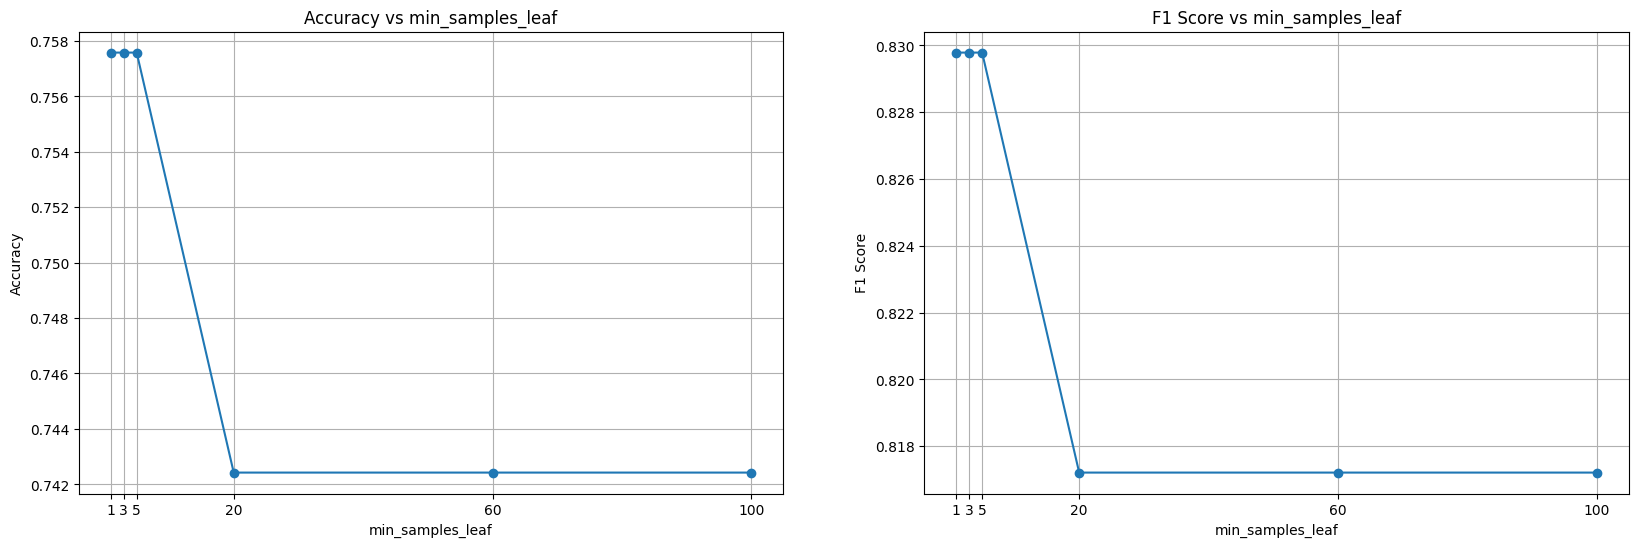

In [18]:
min_samples_leaves = [1, 3, 5, 20, 60, 100]  # Testing different min_samples_leaf values
best_max_depth = 4  # Best depth found from the first analysis
best_min_samples_split = 4  # Best min_samples_split found from the first analysis

# Store accuracies and F1 scores for each min_samples_leaf
leaf_accuracies = []
leaf_f1_scores = []

for min_samples_leaf in min_samples_leaves:
    model = ClassificationTree(max_depth=best_max_depth, 
                               min_samples_split=best_min_samples_split, 
                               min_samples_leaf=min_samples_leaf, 
                               class_weights=class_weights)
    model.fit(X_train, y_train)
    predicted = model.predict(X_valid)
    accuracy = metrics.accuracy(y_true=y_valid, y_pred=predicted)
    leaf_accuracies.append(accuracy)
    f1 = metrics.f1_score(y_true=y_valid, y_pred=predicted)
    leaf_f1_scores.append(f1)

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plotting Accuracy vs min_samples_leaf
axes[0].plot(min_samples_leaves, leaf_accuracies, marker='o')
axes[0].set_title('Accuracy vs min_samples_leaf')
axes[0].set_xlabel('min_samples_leaf')
axes[0].set_ylabel('Accuracy')
axes[0].set_xticks(min_samples_leaves)
axes[0].grid()

# Plotting F1 Score vs min_samples_leaf
axes[1].plot(min_samples_leaves, leaf_f1_scores, marker='o')
axes[1].set_title('F1 Score vs min_samples_leaf')
axes[1].set_xlabel('min_samples_leaf')
axes[1].set_ylabel('F1 Score')
axes[1].set_xticks(min_samples_leaves)
axes[1].grid()

plt.show()


#### Observations for Accuracy (or f1-score) vs. `min_samples_leaf` Values
We see that f1-score follows the same trend as accuracy.  
From the plot generated above, the following can be observed:

1. When `min_samples_leaf` is set to values 1, 3 and 5, the model achieves a consistent accuracy of approximately 0.758.
2. Increasing `min_samples_leaf` to 20 or above leads to a slight drop in accuracy, which stabilizes at approximately 0.742 for larger values.

The relatively small difference in accuracy may be due to our imbalanced dataset, where the number of occurrences of one class (Loan_Status = 'Y') is significantly higher than the other (Loan_Status = 'N'). This imbalance makes it harder for the model to differentiate between the classes effectively as `min_samples_leaf` increases, resulting in a similar accuracy score regardless of the larger values.

Smaller values of `min_samples_leaf` seem very slightly more effective at capturing the dataset's complexity, while larger values may lead to underfitting by reducing the number of leaf nodes and losing detailed information. However, the impact on accuracy is not significant, possibly due to the dataset imbalance.

### Conclusion

Based on both analyses, the optimal hyperparameter combination for this dataset can be chosen as:

- `max_depth` = 4
- `min_samples_split` = 4
- `min_samples_leaf` = 1

These settings yield the best trade-off between model complexity and accuracy while avoiding overfitting or underfitting.


#### Result and metrics for our Classification Tree model by training using training data and validating using validation data

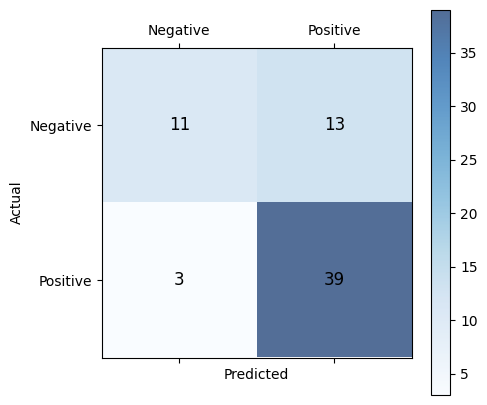

Accuracy for validation data: 0.76
Precision for validation data: 0.75
Recall for validation data: 0.93
F1 score for validation data: 0.83


In [19]:
model = ClassificationTree(max_depth=4, min_samples_split=4, min_samples_leaf=1, class_weights=class_weights)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

accuracy = metrics.accuracy(y_true=y_valid, y_pred=y_pred)
precision = metrics.precision(y_true=y_valid, y_pred=y_pred)
recall = metrics.recall(y_true=y_valid, y_pred=y_pred)
f1 = metrics.f1_score(y_true=y_valid, y_pred=y_pred)

metrics.plot_confusion_matrix(y_true=y_valid, y_pred=y_pred)

print(f"Accuracy for validation data: {accuracy:.2f}")
print(f"Precision for validation data: {precision:.2f}")
print(f"Recall for validation data: {recall:.2f}")
print(f"F1 score for validation data: {f1:.2f}")

### Inference - Classification Tree
Next, we will train our classification tree model using the hyperparameters obtained from the hyperparameter tuning above.  
We will train our final model on the combination of the training and validation sets since we have already tuned our hyperparameters using the validation set, so it would just be a waste to not use the validation set for training before conducting the final inference on the test dataset.

In [20]:
# Combine training and validation datasets
X_train_tree = np.concatenate((X_train, X_valid), axis=0)
y_train_tree = np.concatenate((y_train, y_valid), axis=0)

# Calculate class weights
unique_classes, class_counts = np.unique(y_train_tree, return_counts=True)
total_samples = len(y_train_tree)
class_weights = {cls: total_samples / (len(unique_classes) * count) for cls, count in zip(unique_classes, class_counts)}

# Initialize and train the model
model_tree = ClassificationTree(max_depth=4, min_samples_split=4, min_samples_leaf=1, class_weights=class_weights)
model_tree.fit(X_train_tree, y_train_tree)

# Make predictions on the test set
y_pred_tree = model_tree.predict(X_test)
y_pred_tree = np.where(y_pred_tree == 1, 'Y', 'N')

# Saving the results as per the instructions
cwd = os.getcwd()
output_path = os.path.join(cwd, '..', 'predictions')
output_file = os.path.join(output_path, 'HW2_Test_Result.csv')
df_predictions = pd.DataFrame(y_pred_tree, columns=['pred_tree'])
df_predictions.to_csv(output_file, index=False)

## Part B - Boosting (XGBoost)

Boosting is an ensemble learning technique used in machine learning to improve the accuracy of models by combining the predictions of several weak learners (typically simple models) to form a strong learner. The core idea behind boosting is to train models sequentially, where each new model tries to correct the errors made by the previous models. This process continues iteratively, leading to improved overall performance.

In this section, we will implement a boosting model using the **XGBoost** (Extreme Gradient Boosting) ensemble machine learning algorithm. The goal is to optimize the regularization parameter using **L2 regularization** and tune it by testing different values for `alpha_vals`. We will use **bootstrapping** to train the model multiple times for each alpha value, compute the AUC (Area Under the ROC Curve), and find the best alpha that gives the highest mean AUC.

We will define a function `train_XGBoost()` that:
- Uses **XGBoost** with L2 regularization.
- Returns a dictionary where keys are alpha values and values are corresponding mean AUC scores.
- Applies **bootstrapping** for `n_bootstraps = 100` times, and for each time, the model is trained for `max_iter = 100` iterations.

In [21]:
import xgboost as xgb
from sklearn.metrics import roc_curve, auc

# Define a function to train an XGBoost model
def train_XGBoost(X_train, y_train, X_valid, y_valid, alpha_vals, n_bootstraps=100, max_iter=100):
    aucs_xgboost = {alpha: [] for alpha in alpha_vals}  # Initialize dictionary to store AUCs for each alpha

    np.random.seed(10)  # Set the seed once, to ensure reproducibility

    # Perform bootstrapping for n_bootstraps times
    for _ in range(n_bootstraps):
        # Create bootstrapped samples
        bootstrap_indices = np.random.choice(len(X_train), len(X_train), replace=True)
        X_train_bootstrap = X_train[bootstrap_indices]
        y_train_bootstrap = y_train[bootstrap_indices]

        # Calculate scale_pos_weight for imbalanced classes
        unique_classes, class_counts = np.unique(y_train_bootstrap, return_counts=True)
        num_positive = class_counts[1]
        num_negative = class_counts[0]
        scale_pos_weight = num_negative / num_positive

        # Create XGBoost DMatrix objects
        dtrain = xgb.DMatrix(X_train_bootstrap, label=y_train_bootstrap)
        dvalid = xgb.DMatrix(X_valid, label=y_valid)

        # Loop through each alpha value for the current bootstrapped sample
        for alpha in alpha_vals:
            # Set XGBoost parameters, including L2 regularization (lambda)
            params = {
                'objective': 'binary:logistic',
                'eval_metric': 'auc',
                'lambda': alpha,  # L2 regularization
                'eta': 0.01,
                'max_depth': 3,
                'scale_pos_weight': scale_pos_weight
            }

            # Train the model
            model = xgb.train(params, dtrain, num_boost_round=max_iter)

            # Evaluate the model on the validation set
            y_pred_proba = model.predict(dvalid)
            fpr, tpr, _ = roc_curve(y_valid, y_pred_proba)
            auc_score = auc(fpr, tpr)
            
            # Append the AUC score to the list for this alpha
            aucs_xgboost[alpha].append(auc_score)

    # Calculate the mean AUC for each alpha over all bootstraps
    mean_aucs_xgboost = {alpha: np.mean(aucs) for alpha, aucs in aucs_xgboost.items()}

    return mean_aucs_xgboost

In this code, we:
- Use **XGBoost** for binary classification (`binary:logistic`) with L2 regularization, controlling it through the `lambda` parameter.
- Apply bootstrapping to create new samples from the training data and evaluate the model over several iterations. This ensures that our AUC evaluation is more robust to variance in the data.
- Loop over a range of `alpha_vals` to compute the mean AUC for each alpha. The function returns a dictionary where each alpha maps to its respective mean AUC score.

The parameters used in XGBoost include:
- **`objective`**: Set to `binary:logistic` since our classification label is binary.
- **`eval_metric`**: Set to `auc` as we are using AUC (Area Under the Receiver Operating Characteristic Curve) for evaluating the performance of our model.
- **`lambda`**: L2 regularization, controlled by the alpha values. This helps prevent overfitting by adding a penalty for larger coefficients in the model.
- **`eta`**: Learning rate, which determines the step size at each iteration while moving toward a minimum of the loss function. Lower values make the learning process more robust but require more boosting rounds.
- **`max_depth`**: Maximum depth of the trees. This controls how complex each tree can become, with deeper trees capturing more intricate patterns in the data but also increasing the risk of overfitting.
- **`scale_pos_weight`**: A parameter used to adjust the balance between positive and negative classes. This is particularly useful for our dataset since we have identified earlier that our dataset is imbalanced. This parameter allows the model to assign more weight to the minority class, helping to improve performance on that class. It is calculated as the ratio of the number of negative samples to the number of positive samples in the training set.

Now we will run the function to train the model and evaluate the mean AUC for each alpha.

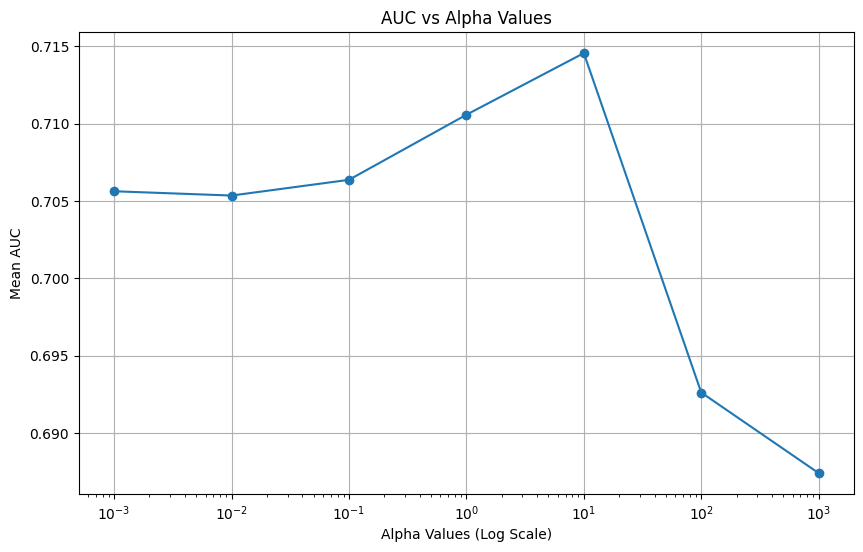

Alpha Values and Corresponding Mean AUCs:
0.001: 0.70563
0.01: 0.70535
0.1: 0.70637
1: 0.71058
10.0: 0.71456
100.0: 0.69262
1000.0: 0.68741

Optimal alpha: 10.0, with mean AUC: 0.71456


In [22]:
# Set alpha values to tune the model
alpha_vals = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
max_iter = 100

X_train_np = X_train.to_numpy()
X_valid_np = X_valid.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_valid_np = y_valid.to_numpy()

# Train XGBoost with different alpha values
results = train_XGBoost(X_train=X_train_np, y_train=y_train_np, X_valid=X_valid_np, y_valid=y_valid_np, alpha_vals=alpha_vals, max_iter=max_iter)

alpha_vals = list(results.keys())
mean_auc_vals = list(results.values())

# Plotting AUC vs. Alpha values
plt.figure(figsize=(10, 6))
plt.plot(alpha_vals, mean_auc_vals, marker='o')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.title('AUC vs Alpha Values')
plt.xlabel('Alpha Values (Log Scale)')
plt.ylabel('Mean AUC')
plt.grid(True)
plt.xticks(alpha_vals)  # Set x-ticks to alpha values for better visibility
plt.show()

best_alpha = max(results, key=results.get)

print("Alpha Values and Corresponding Mean AUCs:")
for alpha, mean_auc in results.items():
    print(f"{alpha}: {mean_auc:.5f}")
print()
print(f"Optimal alpha: {best_alpha}, with mean AUC: {results[best_alpha]:.5f}")


#### Optimal alpha value:
- We specify a range of `alpha_vals` that will control the strength of L2 regularization.
- We convert the training and validation data into NumPy arrays for compatibility with XGBoost.
- We call the `train_XGBoost` function with these alpha values and retrieve the mean AUC for each alpha. The dictionary returned by the function contains the results, and we print the AUC for each alpha.
- We have plotted the graph of AUC vs Alpha Values, where we can clearly visualize how different Alpha value affects the AUC.
- The `best_alpha` is determined by selecting the alpha value with the highest mean AUC.

By tuning the regularization strength, we ensure that the model is neither too complex (overfitting) nor too simple (underfitting). This process helps us find the best trade-off between bias and variance.
- The AUC values for each alpha indicate how well the model generalizes with different levels of regularization. A high AUC score indicates that the model performs well in distinguishing between classes.
- After running the experiment, we find that the optimal alpha value is 10.0 with mean AUC: 0.71

#### Hyperparameter tuning for XGBoost after obtaining optimal L2 regularization parameter
We obtained the optimal L2 regularization alpha value by applying bootstrapping and using the AUC value for evaluating the model performance.  
Next, we will tune various hyperparameters used in XGBoost like `eta`, `max_depth`, `min_child_weight`, and `gamma`. We will create a function that trains the XGBoost model with a combination of hyperparameters and calculates the AUC for each configuration. By getting the AUC for different configurations, we can find the optimal hyperparameters.

In [23]:
from sklearn.metrics import roc_auc_score
# Function for hyperparameter tuning
def tune_xgboost_params(X_train, y_train, X_valid, y_valid, param_grid, max_iter=100):
    results = []
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_valid, label=y_valid)
    unique_classes, class_counts = np.unique(y_train, return_counts=True)
    num_positive = class_counts[1]
    num_negative = class_counts[0]
    scale_pos_weight = num_negative / num_positive

    # Loop through combinations of parameters in the grid
    for eta in param_grid['eta']:
        for max_depth in param_grid['max_depth']:
            for min_child_weight in param_grid['min_child_weight']:
                for gamma in param_grid['gamma']:
                    aucs = []                      
                    # Define XGBoost parameters
                    params = {
                        'objective': 'binary:logistic',
                        'eval_metric': 'auc',
                        'lambda': best_alpha,  # Use the best alpha from previous tuning
                        'eta': eta,
                        'max_depth': max_depth,
                        'min_child_weight': min_child_weight,
                        'gamma': gamma,
                        'scale_pos_weight': scale_pos_weight,
                        'subsample': 0.6,  # Fixed subsample rate for randomness
                        'colsample_bytree': 0.6  # Fixed column sampling rate for randomness
                    }
                    
                    # Train the model
                    model = xgb.train(params, dtrain, num_boost_round=max_iter)
                    
                    # Make predictions on the validation set
                    y_pred_proba = model.predict(dvalid)
                    auc_score = roc_auc_score(y_valid, y_pred_proba)
                    aucs.append(auc_score)
                    results.append({
                        'eta': eta,
                        'max_depth': max_depth,
                        'min_child_weight': min_child_weight,
                        'gamma': gamma,
                        'auc': auc_score
                    })
    
    return results

We defined the function `tune_xgboost_params` that:
- Accepts training and validation data, a grid of parameters, and iterates through all combinations of the parameters.
- Uses `roc_auc_score` to calculate the AUC for the validation set.

Next, we will run the function using a grid of values for different parameters.

In [24]:
# Define the grid of hyperparameters
param_grid = {
    'eta': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 5, 7],
    'min_child_weight': [1, 3, 5, 7, 9],
    'gamma': [0, 0.1, 0.5]
}

# Run the hyperparameter tuning
results_tune = tune_xgboost_params(X_train_np, y_train_np, X_valid_np, y_valid_np, param_grid)

# Sort results by AUC score
sorted_results_tune = sorted(results_tune, key=lambda x: x['auc'], reverse=True)

# Print the top 5 configurations
print("Top 5 configurations:")
for result in sorted_results_tune[:5]:
    print(f"eta: {result['eta']}, max_depth: {result['max_depth']}, min_child_weight: {result['min_child_weight']}, "
          f"gamma: {result['gamma']}, Mean AUC: {result['auc']:.5f}")


Top 5 configurations:
eta: 0.01, max_depth: 3, min_child_weight: 5, gamma: 0, Mean AUC: 0.77976
eta: 0.1, max_depth: 2, min_child_weight: 5, gamma: 0.5, Mean AUC: 0.77976
eta: 0.01, max_depth: 2, min_child_weight: 5, gamma: 0, Mean AUC: 0.77976
eta: 0.01, max_depth: 2, min_child_weight: 5, gamma: 0.1, Mean AUC: 0.77877
eta: 0.01, max_depth: 3, min_child_weight: 5, gamma: 0.1, Mean AUC: 0.77778


We created a grid of values for various hyperparameters that we want to tune:
- `eta`: Learning rate, which controls the step size during optimization.
- `max_depth`: Maximum depth of the trees.
- `min_child_weight`: Minimum sum of instance weight (or the minimum number of samples) required in a child node. It helps prevent overfitting by controlling the tree growth.
- `gamma`: Minimum loss reduction required to make a further partition on a leaf node. It controls the complexity of the model by pruning unnecessary splits.

The function `tune_xgboost_params` iterates over these values, and for each combination, it trains the model and compute the AUC score.

The results are sorted based on the **auc** to identify the top-performing configurations.

The top 5 configurations with the highest AUC scores are printed, showing the values for `eta`, `max_depth`, `min_child_weight` and `gamma`.

We choose the best hyperparameters after this tuning and store it in the `params` variable for further training, testing and inference.

#### Observation
- We notice that after hyperparameter tuning, we were able to increase the AUC from around **0.71** to **0.78** and have improved our model.

In [25]:
# Store the best params obtained from hyperparameter tuning that will be used further
best_params = sorted_results_tune[0]

unique_classes, class_counts = np.unique(y_train_np, return_counts=True)
num_positive = class_counts[1]
num_negative = class_counts[0]
scale_pos_weight = num_negative / num_positive

# Set the optimal hypertuned parameters for the final model
params_optimal = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'lambda': best_alpha,  # Best alpha found earlier
    'eta': best_params['eta'],
    'max_depth': best_params['max_depth'],
    'scale_pos_weight': scale_pos_weight,
    'min_child_weight': best_params['min_child_weight'],
    'gamma': best_params['gamma'],
    'subsample': 0.6,
    'colsample_bytree': 0.6
}

#### Choosing Optimal `max_iter` for XGBoost

We have selected the best hyperparameters for our XGBoost model. Now, we will tune the number of boosting rounds (`max_iter`) to further optimize the model performance.

We will:
- Train the model using different values of `max_iter`.
- Calculate the AUC, accuracy, and F1-score for each `max_iter` on the validation set.
- Plot the performance metrics against `max_iter` to select the optimal number of boosting rounds.

max_iter: 10, AUC: 0.7624, Accuracy: 0.6970, F1-Score: 0.7619
max_iter: 20, AUC: 0.7763, Accuracy: 0.7727, F1-Score: 0.8235
max_iter: 40, AUC: 0.7798, Accuracy: 0.8030, F1-Score: 0.8539
max_iter: 100, AUC: 0.7798, Accuracy: 0.7727, F1-Score: 0.8276
max_iter: 250, AUC: 0.7788, Accuracy: 0.7576, F1-Score: 0.8140
max_iter: 500, AUC: 0.7808, Accuracy: 0.7576, F1-Score: 0.8095


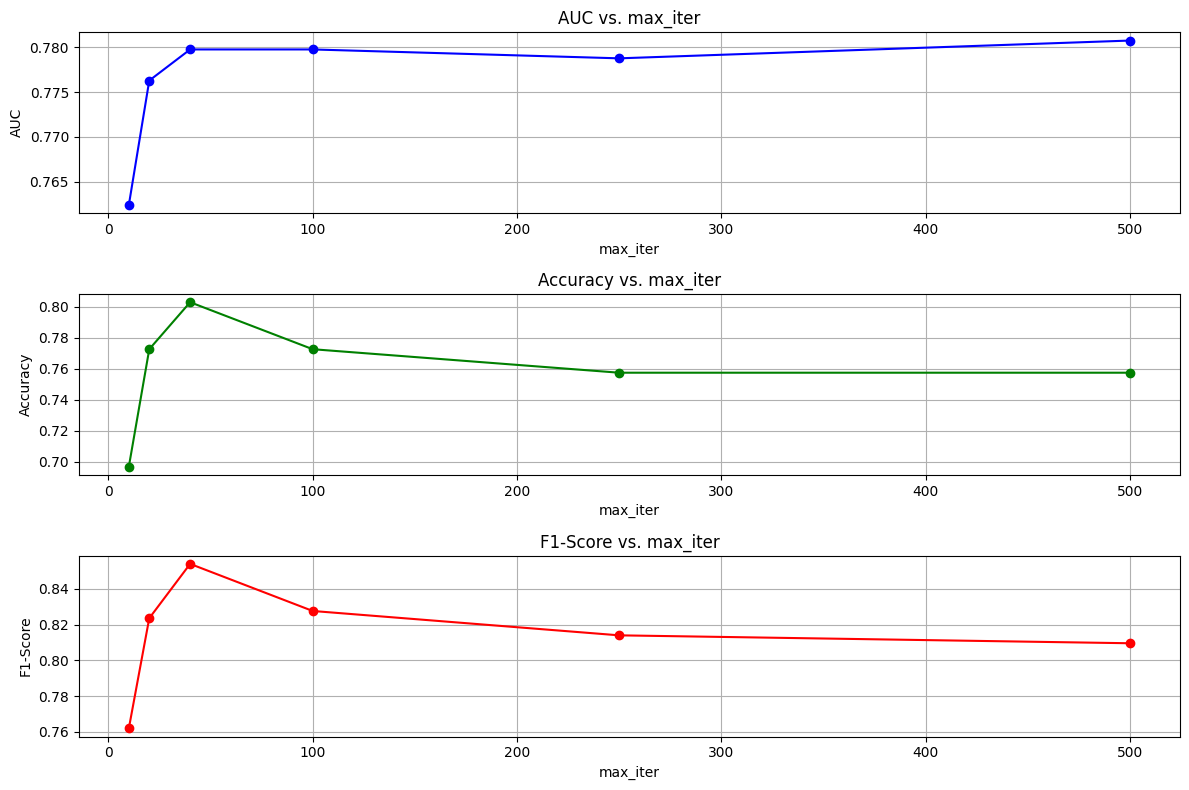

In [26]:
max_iter_values = [10, 20, 40, 100, 250, 500]

# Lists to store results for plotting
auc_scores = []
accuracies = []
f1_scores = []

dtrain = xgb.DMatrix(X_train_np, label=y_train_np)
dvalid = xgb.DMatrix(X_valid_np, label=y_valid_np)

# Loop through each value of max_iter
for max_iter in max_iter_values:    
    # Train the model
    model = xgb.train(params_optimal, dtrain, num_boost_round=max_iter)
    
    # Make predictions on validation data
    y_pred_proba = model.predict(dvalid)
    y_pred = np.where(y_pred_proba >= 0.5, 1, 0)  # Convert probabilities to binary predictions
    
    # Calculate AUC
    auc_score = roc_auc_score(y_valid_np, y_pred_proba)
    auc_scores.append(auc_score)
    
    # Calculate accuracy
    accuracy = metrics.accuracy(y_valid_np, y_pred)
    accuracies.append(accuracy)
    
    # Calculate F1-score
    f1 = metrics.f1_score(y_valid_np, y_pred)
    f1_scores.append(f1)
    
    # Print intermediate results for each max_iter
    print(f"max_iter: {max_iter}, AUC: {auc_score:.4f}, Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")

# Plot AUC, accuracy, and F1-score with respect to max_iter
plt.figure(figsize=(12, 8))

# AUC Plot
plt.subplot(3, 1, 1)
plt.plot(max_iter_values, auc_scores, marker='o', color='blue', label='AUC')
plt.title('AUC vs. max_iter')
plt.xlabel('max_iter')
plt.ylabel('AUC')
plt.grid(True)

# Accuracy Plot
plt.subplot(3, 1, 2)
plt.plot(max_iter_values, accuracies, marker='o', color='green', label='Accuracy')
plt.title('Accuracy vs. max_iter')
plt.xlabel('max_iter')
plt.ylabel('Accuracy')
plt.grid(True)

# F1-score Plot
plt.subplot(3, 1, 3)
plt.plot(max_iter_values, f1_scores, marker='o', color='red', label='F1-Score')
plt.title('F1-Score vs. max_iter')
plt.xlabel('max_iter')
plt.ylabel('F1-Score')
plt.grid(True)

# Show all plots
plt.tight_layout()
plt.show()


We see that we can optimize the model's performance slightly more by choosing the optimal value of max_iter.

The **plots** provide a visual guide to selecting the best `max_iter`. Observing the plots above, we can choose the value that balances the AUC, accuracy, and F1-score, which seems to be for **`max_iter = 40`**

#### Train and Test the Model with the Best Parameters

In this step, we will use the optimal value of `alpha` (L2 regularization) and the optimal hyperparameters that we identified earlier to train the XGBoost model. After training, we will make predictions on the validation data and evaluate the model's performance by calculating various metrics such as accuracy, precision, recall, and F1-score.

Finally, we will plot the confusion matrix to visualize the performance of the classifier.

Accuracy for validation data: 0.80
Precision for validation data: 0.81
Recall for validation data: 0.90
F1 score for validation data: 0.85


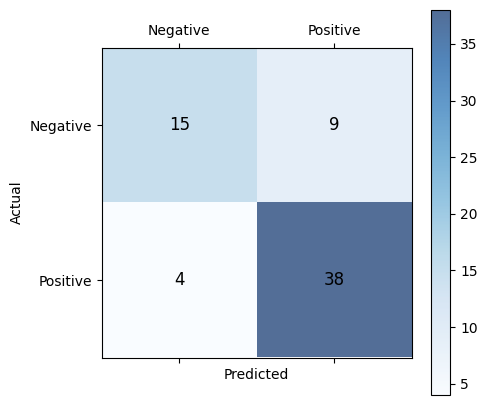

In [27]:
dtrain = xgb.DMatrix(X_train_np, label=y_train_np)
dvalid = xgb.DMatrix(X_valid_np, label=y_valid_np)

max_iter_optimal = 40

# Train the model
model = xgb.train(params_optimal, dtrain, num_boost_round=max_iter_optimal)
y_pred_proba = model.predict(dvalid)
y_pred = np.where(y_pred_proba >= 0.5, 1, 0) # Convert probabilities to binary predictions (threshold = 0.5)

accuracy = metrics.accuracy(y_valid_np, y_pred)
precision = metrics.precision(y_valid_np, y_pred)
recall = metrics.recall(y_valid_np, y_pred)
f1 = metrics.f1_score(y_valid_np, y_pred)

print(f"Accuracy for validation data: {accuracy:.2f}")
print(f"Precision for validation data: {precision:.2f}")
print(f"Recall for validation data: {recall:.2f}")
print(f"F1 score for validation data: {f1:.2f}")

metrics.plot_confusion_matrix(y_valid_np, y_pred)

#### Plot the ROC Curve and Calculate AUC

The **ROC curve** (Receiver Operating Characteristic curve) is a graphical representation of a classifier's ability to distinguish between classes. It plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at different threshold values. The **Area Under the Curve (AUC)** represents the classifier's performance — a higher AUC indicates better classification ability.

Let's now plot the ROC curve for our XGBoost model and compute the AUC score.

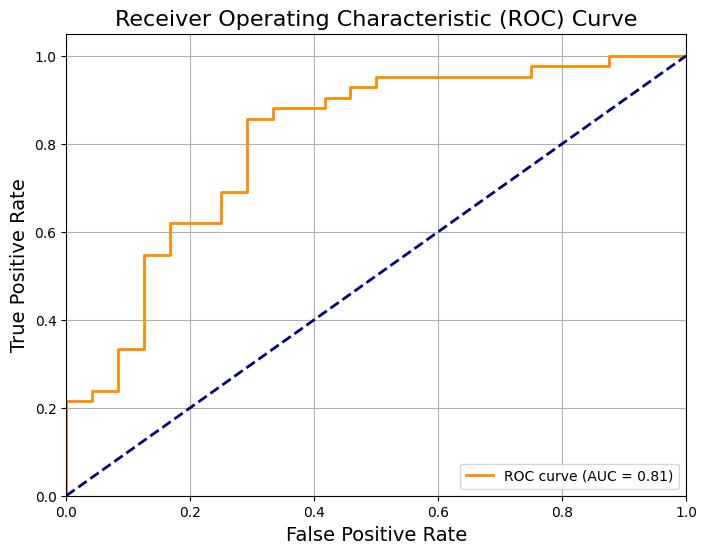

AUC Score: 0.81


In [242]:
# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_valid_np, y_pred_proba)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC score
print(f"AUC Score: {roc_auc:.2f}")


The **ROC curve** shows the performance of the XGBoost model by plotting the true positive rate against the false positive rate at various threshold settings. The **AUC (Area Under Curve)** is also printed above, which quantifies the overall model performance.

## Inference

In [238]:
# Combine training and validation datasets
X_train_xgb = np.concatenate((X_train_np, X_valid_np), axis=0)
y_train_xgb = np.concatenate((y_train_np, y_valid_np), axis=0)

dtrain_xgb = xgb.DMatrix(X_train_xgb, label=y_train_xgb)
dtest_xgb = xgb.DMatrix(X_test_np)

# Train the model
model_xgb = xgb.train(params_optimal, dtrain_xgb, num_boost_round=max_iter_optimal)
y_pred_proba_xgb = model_xgb.predict(dtest_xgb)
y_pred_xgb = np.where(y_pred_proba_xgb >= 0.5, 'Y', 'N') # Convert probabilities to binary predictions (threshold = 0.5)

# Create a DataFrame to save the predictions
predictions_df = pd.DataFrame({
    'pred_tree': y_pred_tree,
    'pred_xgboost': y_pred_xgb
})

# Current working directory
cwd = os.getcwd()

# Relative paths
output_path = os.path.join(cwd, '..', 'predictions', 'Prakhar_Suryavansh_preds.csv')

# Save the predictions to a CSV file
predictions_df.to_csv(output_path, index=False)


We used our trained Classification Tree and XGBoost models to predict the `Loan_Status` on the test dataset. The predictions were saved in a CSV file with two columns: `pred_tree` for the tree classifier predictions and `pred_xgboost` for the XGBoost predictions.

You can find the predictions file at the following relative path: `../predictions/Prakhar_Suryavansh_preds.csv`

**Thank you!**